In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.font_manager

# Load the dataset
file_path = "/workspaces/DiariosModernos/prueba_criterios.csv"
df = pd.read_csv(file_path, encoding='unicode_escape')

df = df.drop(columns=["PeriodicosID", "Fecha", "envio_total", "cobrable", "devuelto", "vendido"], errors="ignore")
df["Ventas"] = df["Ventas"].replace("[^\d.]", "", regex=True).astype(float)
numeric_cols = df.select_dtypes(include=['number']).columns


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_76526/2132469789.py:12: SyntaxWarning: invalid escape sequence '\d'
  df["Ventas"] = df["Ventas"].replace("[^\d.]", "", regex=True).astype(float)


/tmp/ipykernel_76526/1785303349.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby("Sales_Category")[selected_criteria].mean()


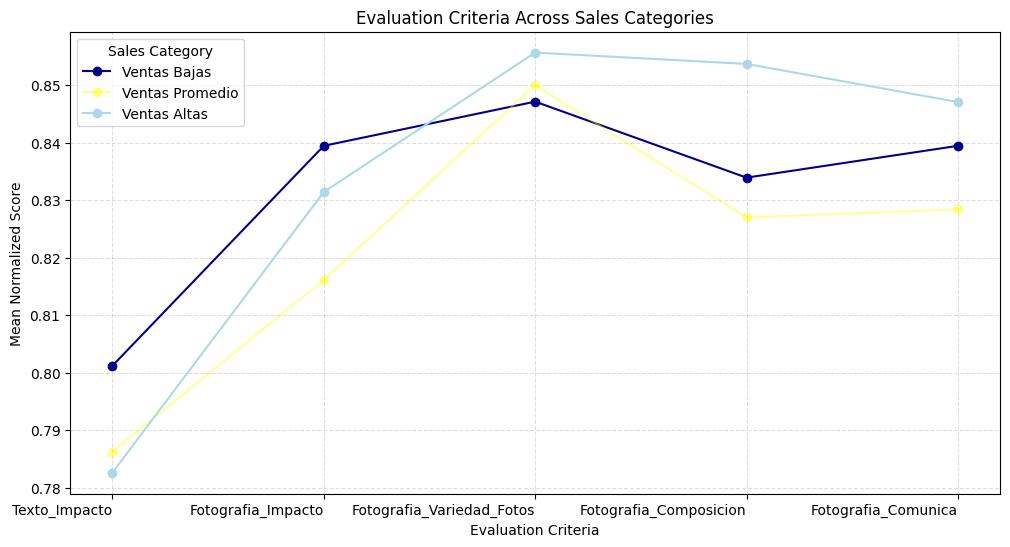

In [9]:
# Assuming `df` is already processed (dropping columns, etc.)
# Normalize the selected criteria
scaler = MinMaxScaler()
df[selected_criteria] = scaler.fit_transform(df[selected_criteria])

# Add Sales Category (low, medium, high)
df["Sales_Category"] = pd.qcut(df["Ventas"], q=3, labels=["Ventas Bajas", "Ventas Promedio", "Ventas Altas"])

# Group by sales category and compute the mean for selected criteria
grouped_df = df.groupby("Sales_Category")[selected_criteria].mean()

# Create the figure
plt.figure(figsize=(12, 6))

# Transpose the grouped DataFrame for plotting
grouped_df_T = grouped_df.T

# Define the colors for each sales category
colors = {
    "Ventas Bajas": "darkblue",
    "Ventas Promedio": "yellow",
    "Ventas Altas": "lightblue"
}

# Plot each sales category as a separate line with the specified colors
for category in grouped_df_T.columns:
    # Set transparency for 'Ventas Promedio'
    alpha = 0.4 if category == "Ventas Promedio" else 1.0
    plt.plot(grouped_df_T.index, grouped_df_T[category], marker='o', label=category, color=colors[category], alpha=alpha)

# Customize the plot
plt.title("Evaluation Criteria Across Sales Categories")
plt.xlabel("Evaluation Criteria")
plt.ylabel("Mean Normalized Score")
plt.xticks(rotation=0, ha="right")  # Rotate labels for readability
plt.legend(title="Sales Category")
plt.grid(True, linestyle="--", alpha=0.4)

# Show the plot
plt.show()